In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
telco_base_data = pd.read_csv("telco.csv")
telco_base_data.head(2)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.0,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.8,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer


In [3]:
telco_base_data.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [4]:
telco_base_data.shape

(7043, 50)

In [5]:
telco_base_data.drop(columns= ['Country', 'Number of Dependents', 'Age', 'Under 30', 'State', 'City' ,'Zip Code', 
                               'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Offer', 'Avg Monthly Long Distance Charges',
       'Internet Type', 'Avg Monthly GB Download', 'Streaming Music', 'Unlimited Data',
       'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'], axis=1, inplace= True)

In [6]:
telco_base_data.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Married', 'Dependents',
       'Tenure in Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Churn Label'],
      dtype='object')

In [7]:
telco_base_data.shape

(7043, 21)

In [8]:
telco_base_data.dtypes

Customer ID                object
Gender                     object
Senior Citizen             object
Married                    object
Dependents                 object
Tenure in Months            int64
Phone Service              object
Multiple Lines             object
Internet Service           object
Online Security            object
Online Backup              object
Device Protection Plan     object
Premium Tech Support       object
Streaming TV               object
Streaming Movies           object
Contract                   object
Paperless Billing          object
Payment Method             object
Monthly Charge            float64
Total Charges             float64
Churn Label                object
dtype: object

In [9]:
telco_base_data.describe()

,Tenure in Months,Monthly Charge,Total Charges
count,7043.000000,7043.000000,7043.000000
mean,32.386767,64.761692,2280.381264
std,24.542061,30.090047,2266.220462
min,1.000000,18.250000,18.800000
25%,9.000000,35.500000,400.150000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [10]:
telco_base_data.isnull().sum()

Customer ID               0
Gender                    0
Senior Citizen            0
Married                   0
Dependents                0
Tenure in Months          0
Phone Service             0
Multiple Lines            0
Internet Service          0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charge            0
Total Charges             0
Churn Label               0
dtype: int64

In [11]:
telco_base_data['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             7043 non-null   object 
 1   Gender                  7043 non-null   object 
 2   Senior Citizen          7043 non-null   object 
 3   Married                 7043 non-null   object 
 4   Dependents              7043 non-null   object 
 5   Tenure in Months        7043 non-null   int64  
 6   Phone Service           7043 non-null   object 
 7   Multiple Lines          7043 non-null   object 
 8   Internet Service        7043 non-null   object 
 9   Online Security         7043 non-null   object 
 10  Online Backup           7043 non-null   object 
 11  Device Protection Plan  7043 non-null   object 
 12  Premium Tech Support    7043 non-null   object 
 13  Streaming TV            7043 non-null   object 
 14  Streaming Movies        7043 non-null   

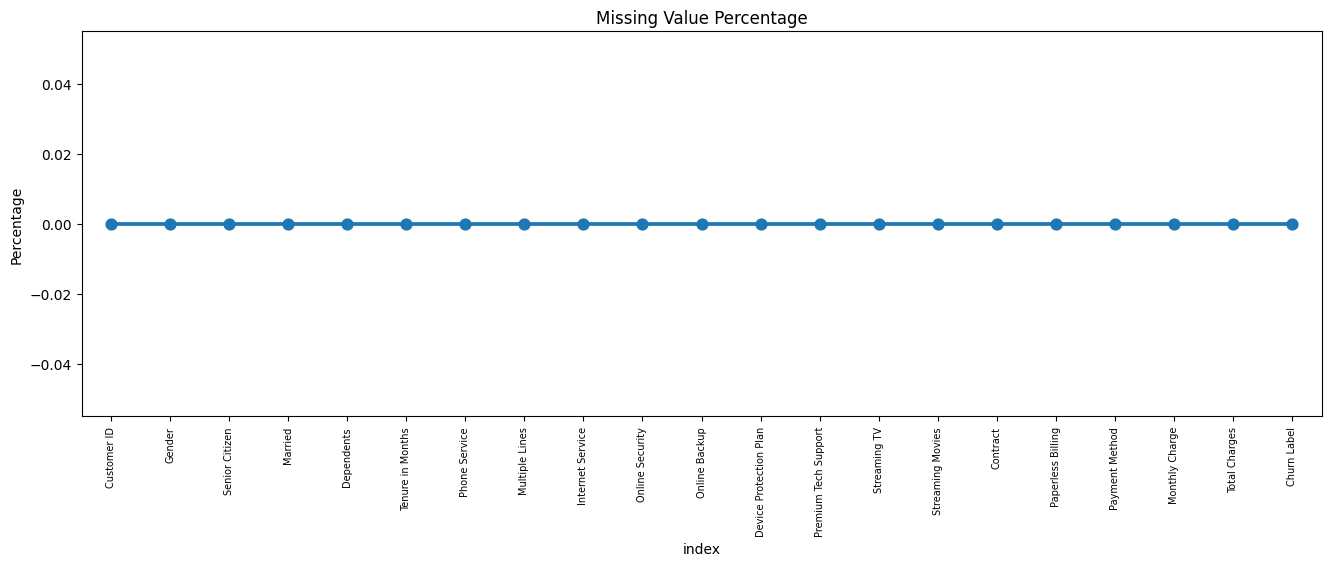

In [13]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
missing.columns = ['index', 'Percentage']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title('Missing Value Percentage')
plt.ylabel('Percentage')
plt.show()


In [14]:
print(telco_base_data['Tenure in Months'].max())

72


In [15]:
labels = ["{0} - {1}".format(i, 1 + 11) for i in range(1,72,12)]
telco_base_data["Tenure_group"] = pd.cut(telco_base_data["Tenure in Months"], range(1,80,12), right=False, labels=labels)

In [16]:
telco_base_data['Tenure_group'].value_counts()

Tenure_group
1 - 12     2186
61 - 12    1407
13 - 12    1024
25 - 12     832
49 - 12     832
37 - 12     762
Name: count, dtype: int64

In [17]:
telco_base_data.drop(columns=['Customer ID', 'Tenure in Months'], axis=1, inplace=True)

In [18]:
telco_base_data.head(2)

,Gender,Senior Citizen,Married,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Churn Label,Tenure_group
0,Male,Yes,No,No,No,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,Yes,1 - 12
1,Female,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30,Yes,1 - 12


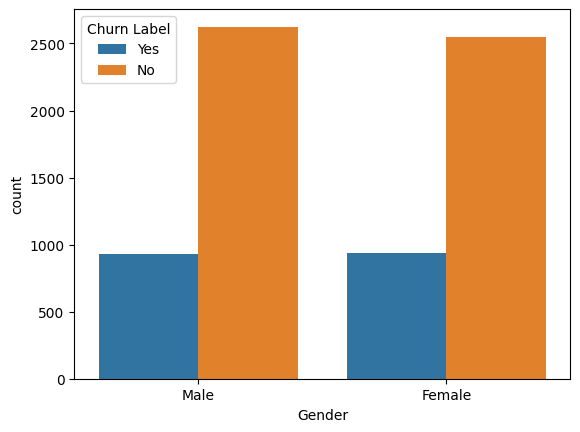

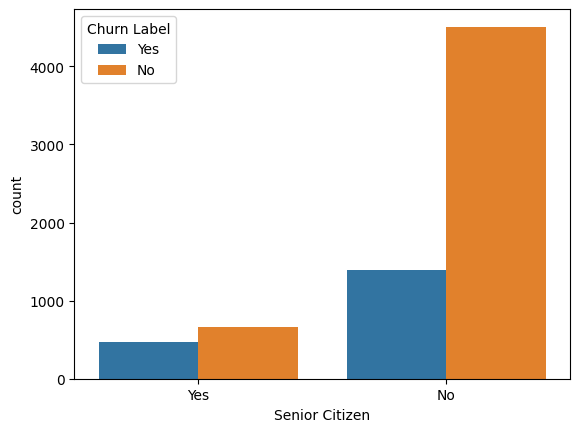

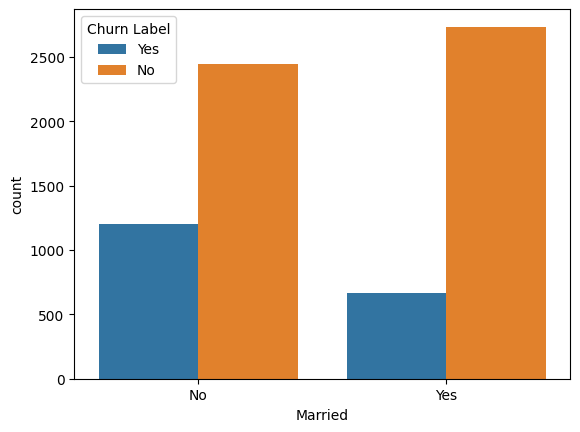

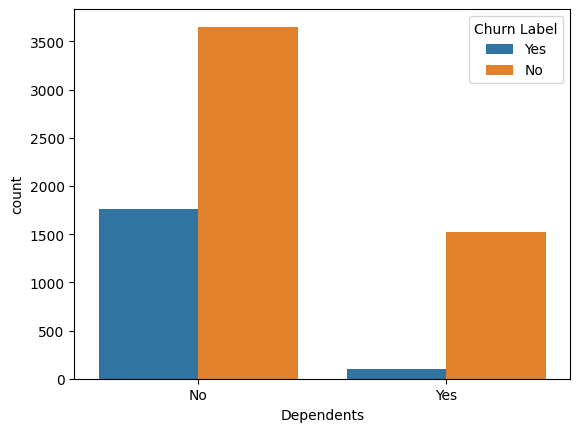

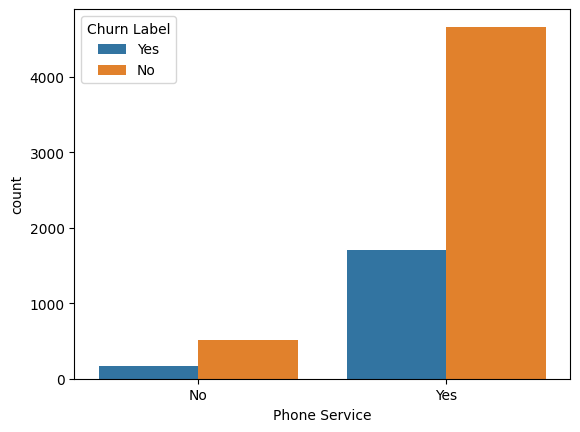

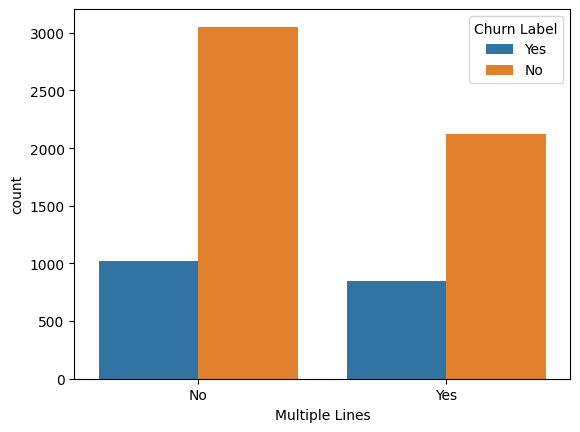

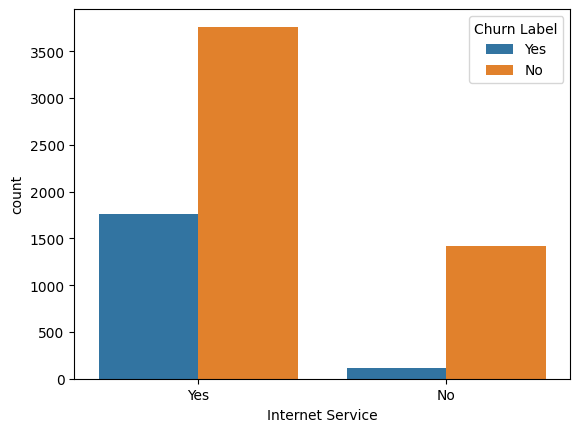

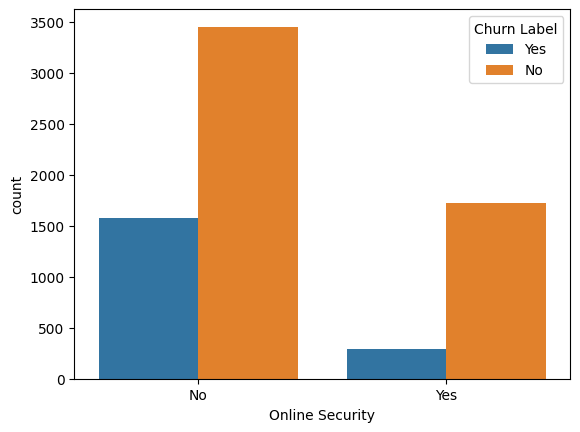

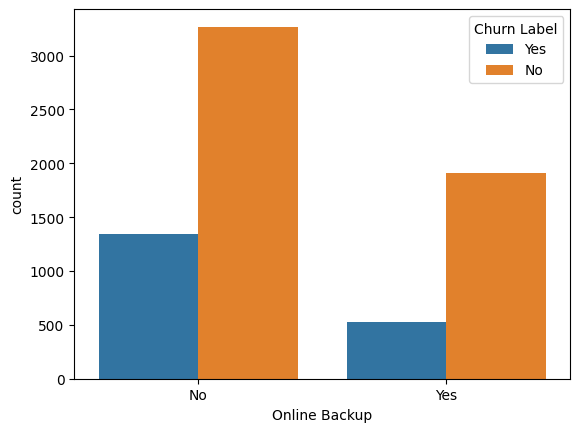

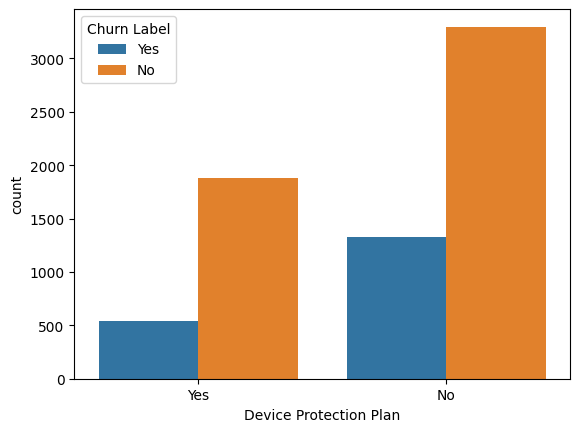

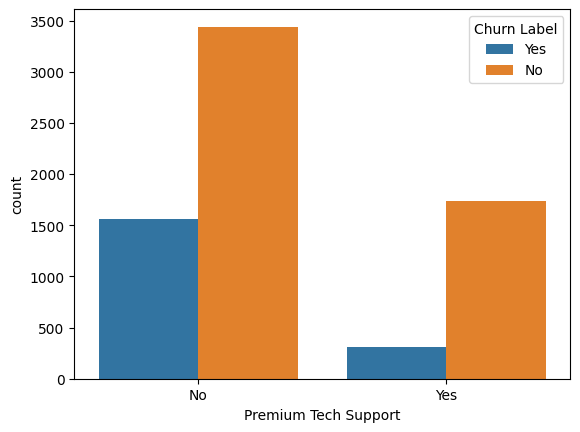

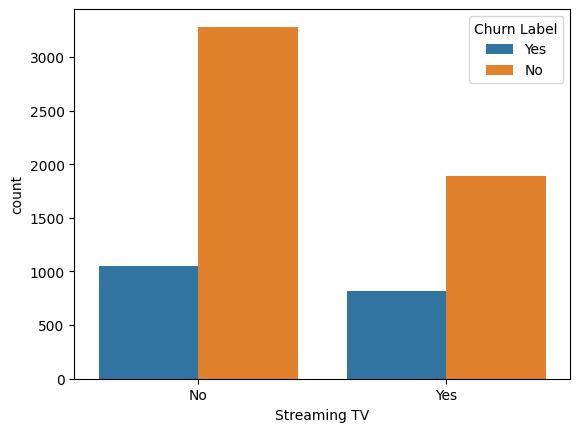

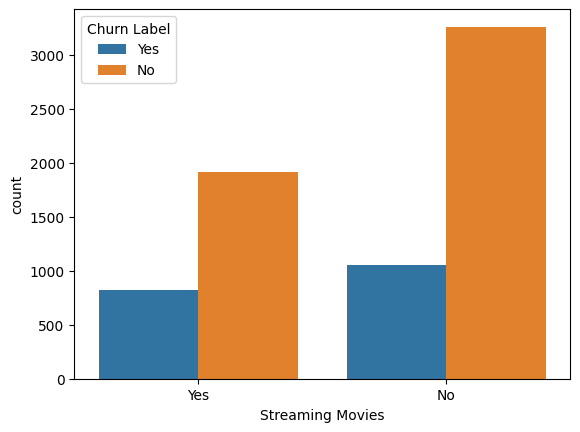

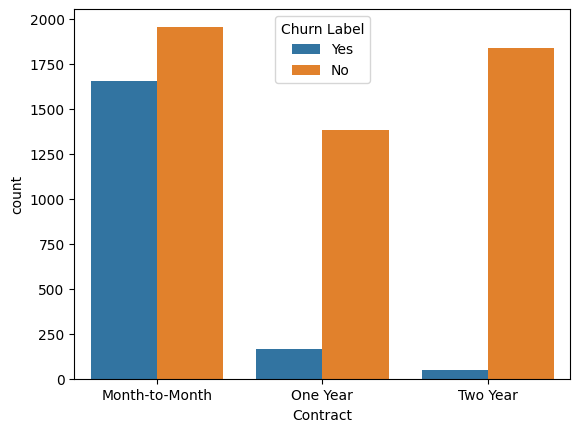

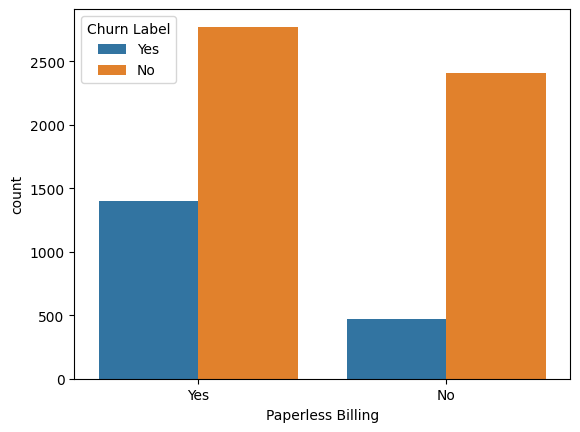

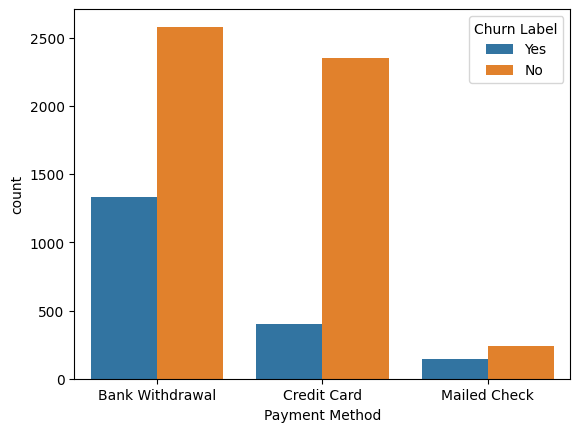

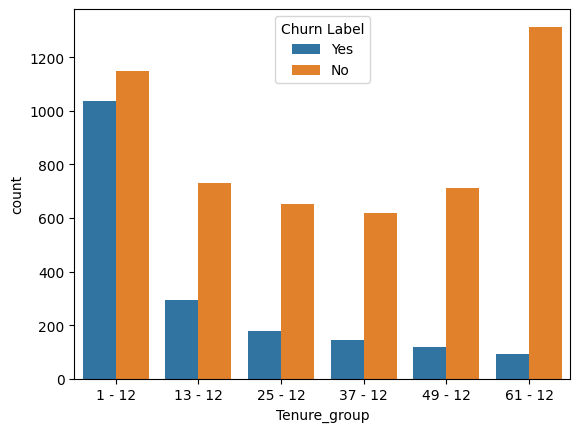

In [19]:
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn Label', 'Total Charges', 'Monthly Charge'])):
    plt.figure(i)
    sns.countplot(data= telco_base_data, x=predictor, hue= 'Churn Label')

### Convert 'Churn Label" into binary numeric value yer to 1 and No to 0

In [20]:
telco_base_data['Churn Label'] = np.where(telco_base_data['Churn Label'] == "Yes", 1, 0)

In [21]:
telco_base_data.head(2)

,Gender,Senior Citizen,Married,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Churn Label,Tenure_group
0,Male,Yes,No,No,No,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,1,1 - 12
1,Female,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30,1,1 - 12


## Convert categorical variables into Dummy variables

In [22]:
telco_base_data_dummies = pd.get_dummies(telco_base_data)
telco_base_data_dummies.head(2)

,Monthly Charge,Total Charges,Churn Label,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,...,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Tenure_group_1 - 12,Tenure_group_13 - 12,Tenure_group_25 - 12,Tenure_group_37 - 12,Tenure_group_49 - 12,Tenure_group_61 - 12
0,39.65,39.65,1,False,True,False,True,True,False,True,...,True,True,False,False,True,False,False,False,False,False
1,80.65,633.30,1,True,False,False,True,False,True,False,...,True,False,True,False,True,False,False,False,False,False


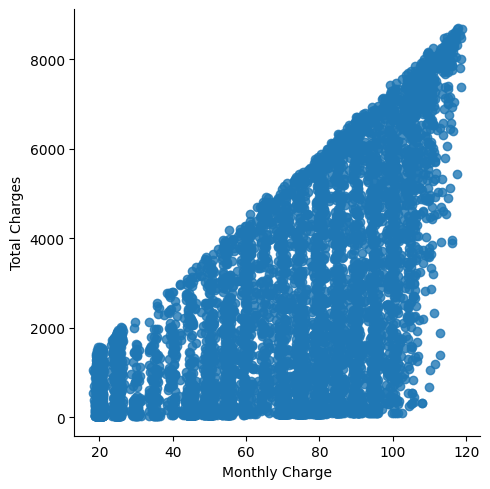

In [23]:
sns.lmplot(data=telco_base_data_dummies, x='Monthly Charge', y='Total Charges', fit_reg=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5932\834733287.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth= sns.kdeplot(telco_base_data_dummies['Monthly Charge'][(telco_base_data_dummies['Churn Label'] == 0)],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5932\834733287.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth= sns.kdeplot(telco_base_data_dummies['Monthly Charge'][(telco_base_data_dummies['Churn Label'] == 1)],


Text(0.5, 1.0, 'Monthly Charges by Churn')

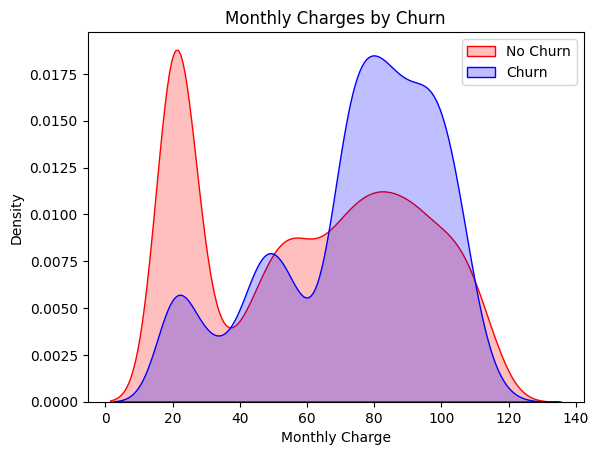

In [24]:
Mth= sns.kdeplot(telco_base_data_dummies['Monthly Charge'][(telco_base_data_dummies['Churn Label'] == 0)],
                 color='Red', shade= True)
Mth= sns.kdeplot(telco_base_data_dummies['Monthly Charge'][(telco_base_data_dummies['Churn Label'] == 1)],
                 ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn", "Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charge')
Mth.set_title('Monthly Charges by Churn')

<Axes: >

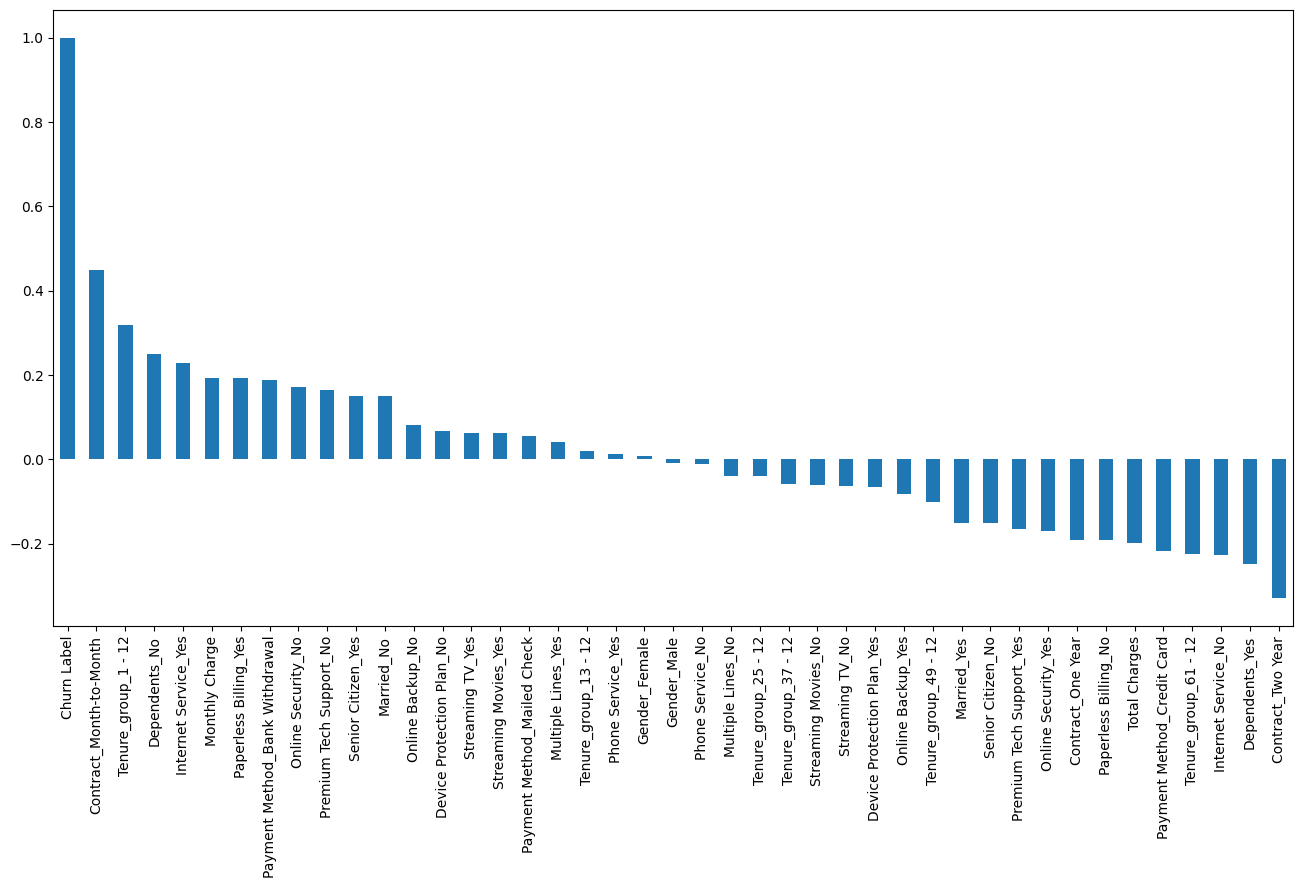

In [25]:
plt.figure(figsize=(16,8))
telco_base_data_dummies.corr()['Churn Label'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

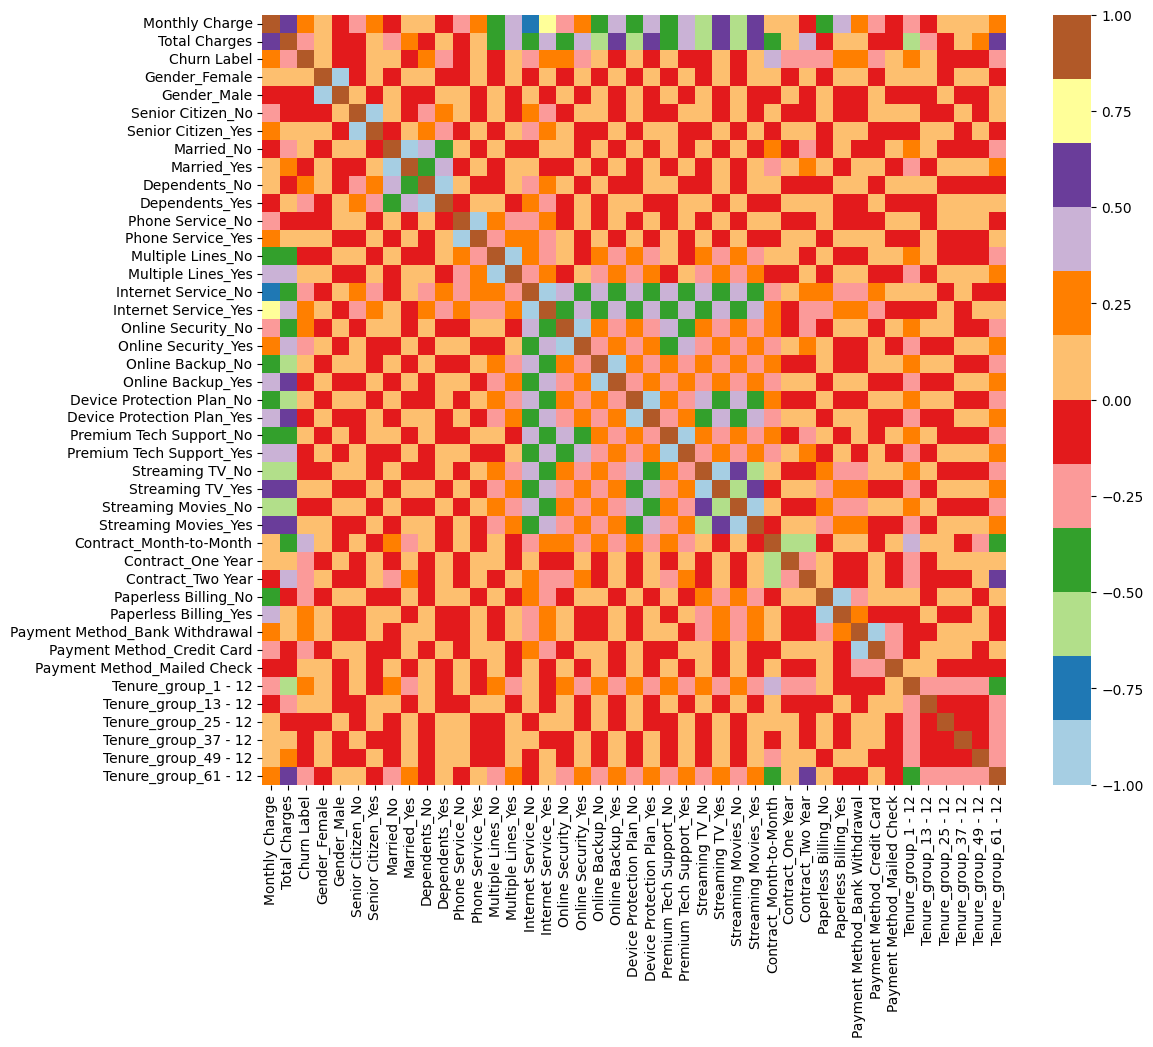

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(telco_base_data_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [27]:
new_df0 = telco_base_data.loc[telco_base_data['Churn Label']==0]
new_df1 = telco_base_data.loc[telco_base_data['Churn Label']==1]

In [28]:
def uniplot(df,col,title,hue = None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.ylabel('log')
    plt.title(title)
    ax = sns.countplot(data=df, x= col, order=df[col].value_counts().index, hue=hue, palette='bright')

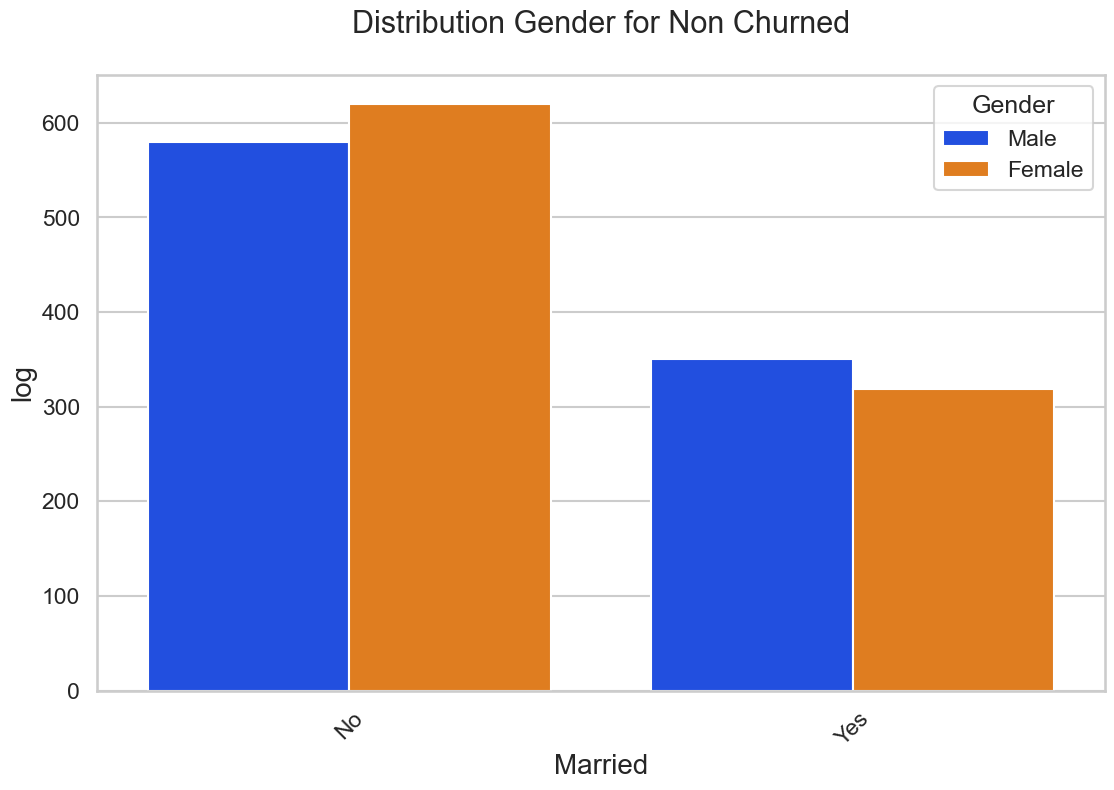

In [29]:
uniplot(new_df1, col="Married", title="Distribution Gender for Non Churned", hue='Gender')

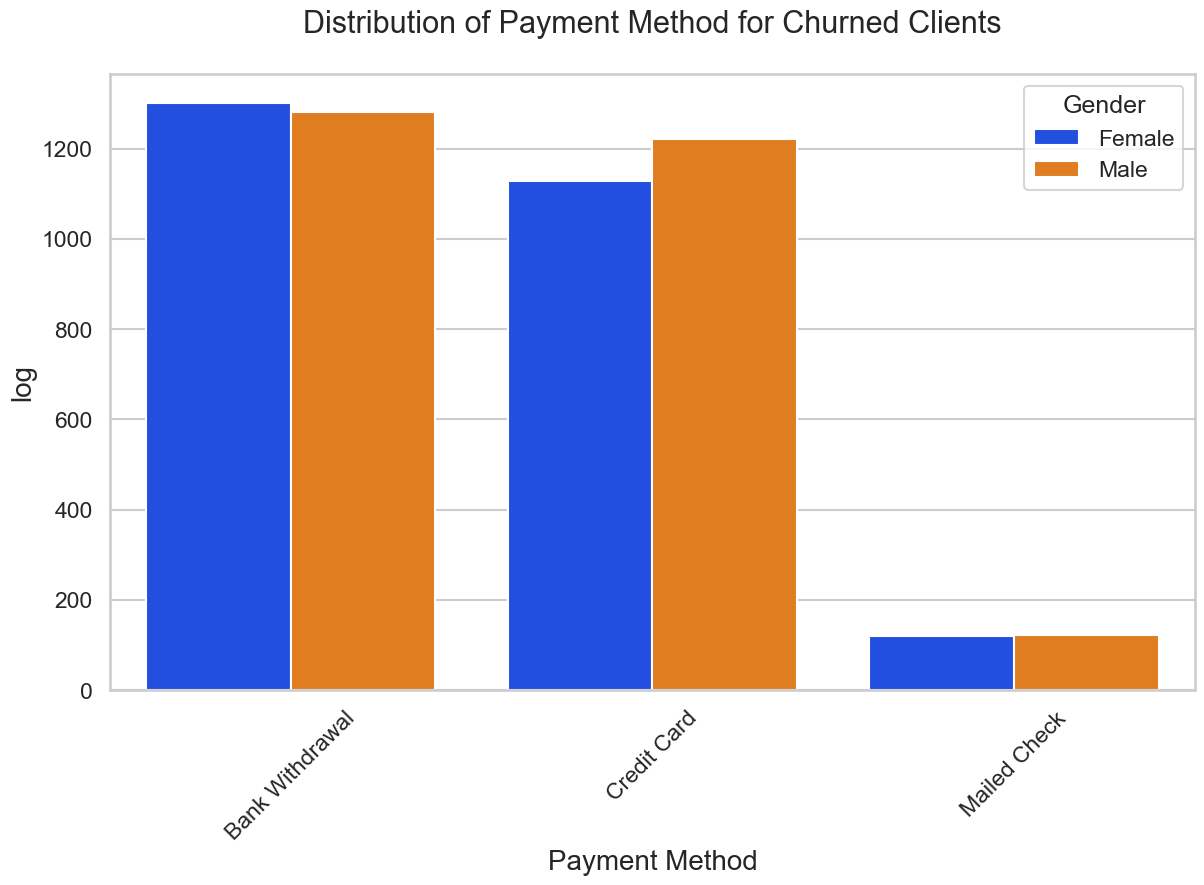

In [30]:
uniplot(new_df0, col="Payment Method", title="Distribution of Payment Method for Churned Clients", hue='Gender')

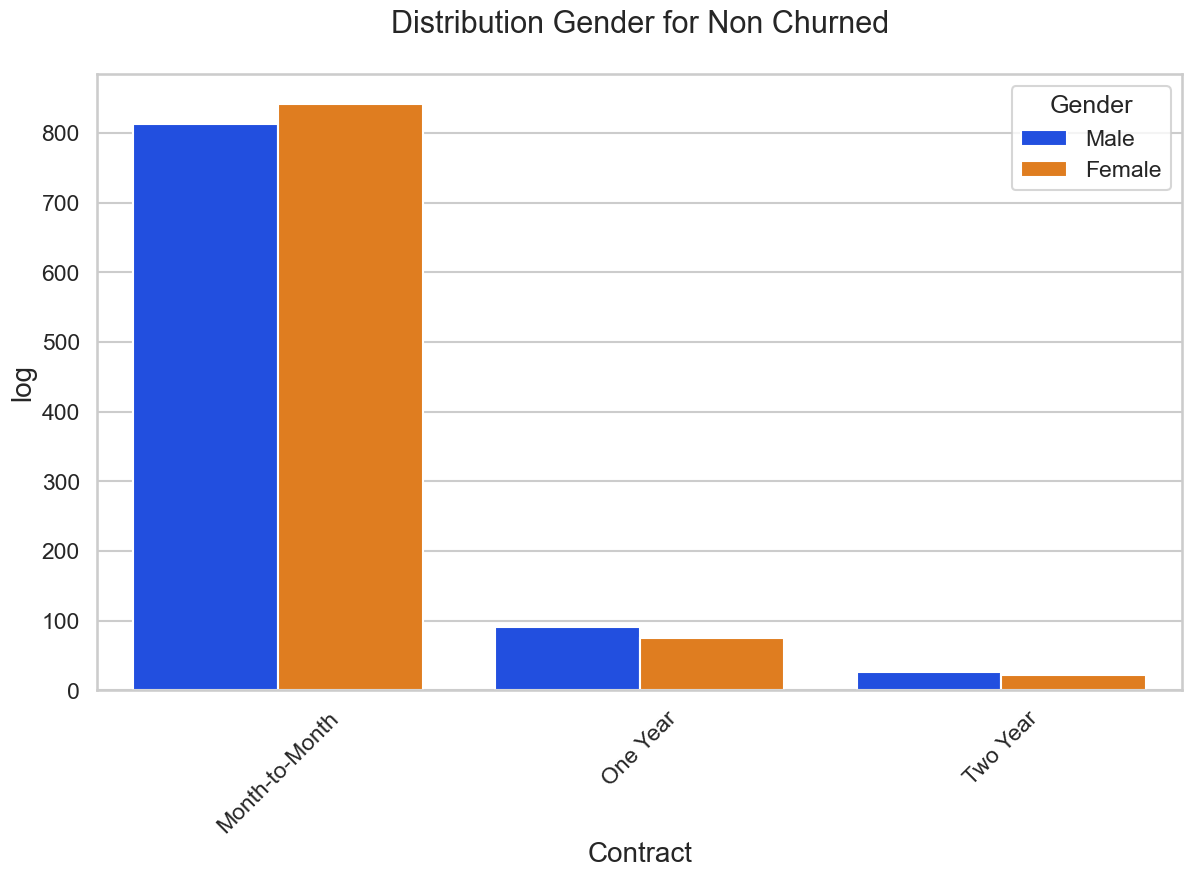

In [31]:
uniplot(new_df1, col="Contract", title="Distribution Gender for Non Churned", hue='Gender')

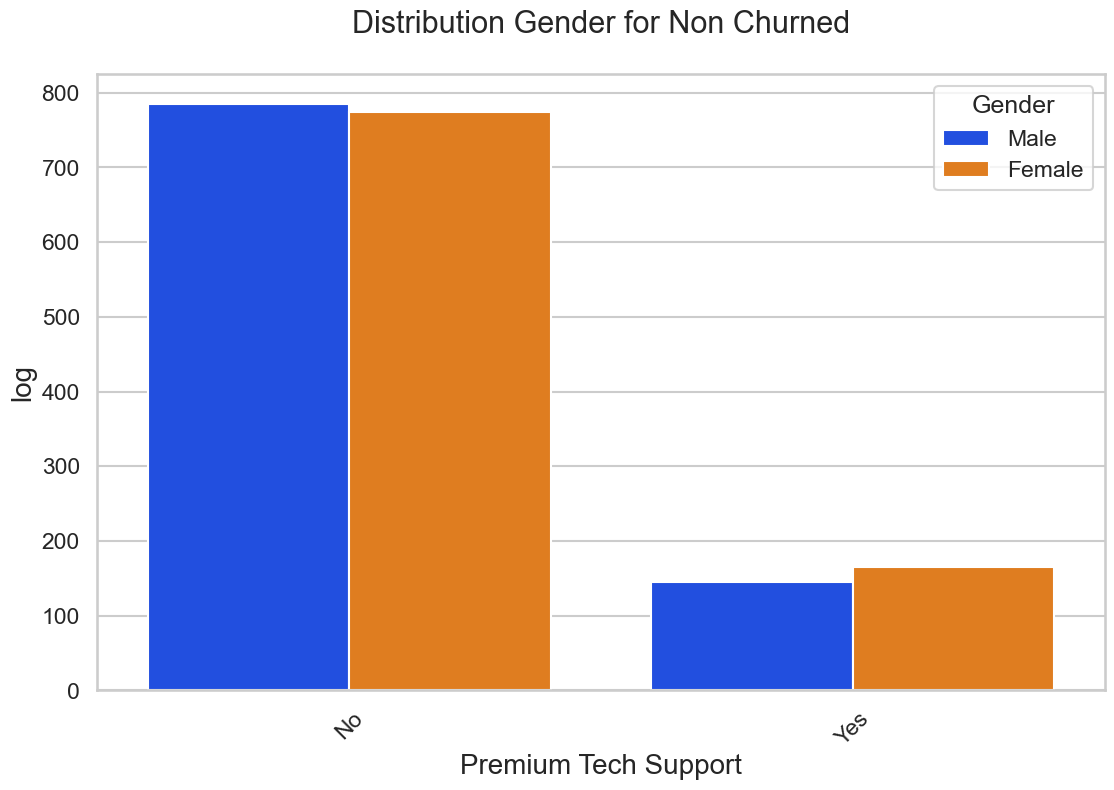

In [32]:
uniplot(new_df1, col="Premium Tech Support", title="Distribution Gender for Non Churned", hue='Gender')


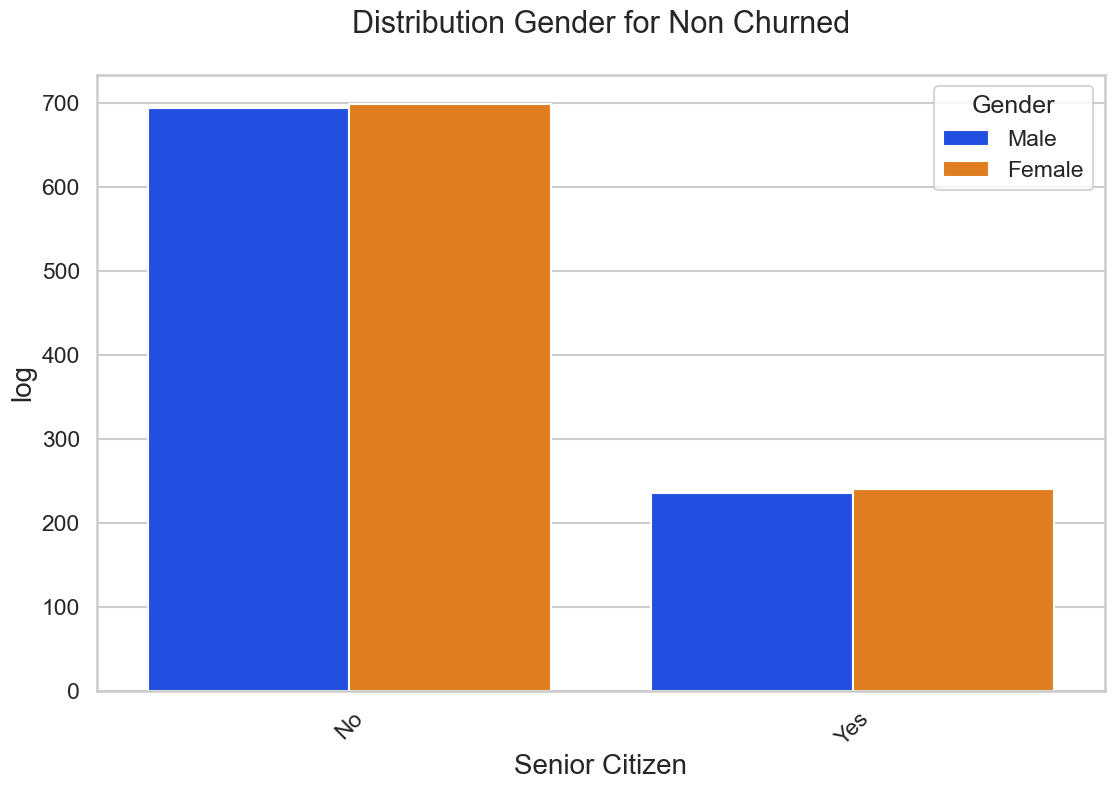

In [33]:
uniplot(new_df1, col="Senior Citizen", title="Distribution Gender for Non Churned", hue='Gender')


In [34]:
# telco_base_data_dummies.to_csv("tel_churn.csv")

In [35]:
telco_base_data_dummies.columns

Index(['Monthly Charge', 'Total Charges', 'Churn Label', 'Gender_Female',
       'Gender_Male', 'Senior Citizen_No', 'Senior Citizen_Yes', 'Married_No',
       'Married_Yes', 'Dependents_No', 'Dependents_Yes', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_Yes',
       'Internet Service_No', 'Internet Service_Yes', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Paperless Billing_No', 'Paperless Billing_Yes',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Tenure_group_1 - 12',
       'Tenure_group_13 - 12', 'Tenure_group_25 - 12', 'Tenure_grou